In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

<h3>최동원 선수 생전 연봉(1983~1988)의 데이터와 대한민국 투수의 평균 연봉을 가지고
선형회귀를 통해 최동원 선수가 살아 있었을 경우 2015~2020사이의 연봉이 어떨지 예측.
사용 데이터 최동원선수 연봉 데이터(1983~1988), 대한민국 투수의 평균 연봉(1983~1988),
현시대의 연봉 데이터(2015~2020)를 결합해서 최동원의 연봉을 추측한다.
동시대 데이터(1983~1988) 데이터를 결합해 다른시기(2015~2020)의 한쪽의 데이터가 있으면
그 값에 따라 다른 한쪽에 데이터를 추측할 수 있게 만들었다<\h3>

2015년~2022년 최동원 선수의 예측 연봉:
2015년: 1756216.22 (약 1.76억)
2016년: 1854864.86 (약 1.85억)
2017년: 1953513.51 (약 1.95억)
2018년: 2052162.16 (약 2.05억)
2019년: 2150810.81 (약 2.15억)
2020년: 2249459.46 (약 2.25억)
total :  12.01


/home/kjj37/venv/machine_learning/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kjj37/venv/machine_learning/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kjj37/venv/machine_learning/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kjj37/venv/machine_learning/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kjj37/venv/machine_learning/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Gly

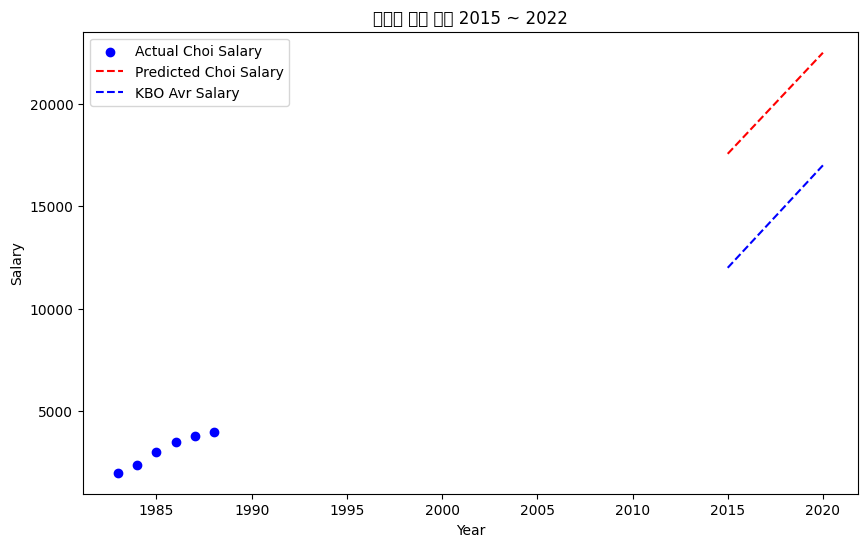

In [23]:
# ------------------------------------문제 1번) 데이터 준비
years = np.array([1983, 1984, 1985, 1986, 1987, 1988]).reshape(-1, 1)  # 연도

choi_salary = np.array([2000, 2400, 3000, 3500, 3800, 4000])  # 최동원 선수 연봉 데이터
average_salary = np.array([1200, 1500, 1800, 2000, 2200, 2500])  # 한국 야구선수 평균 연봉 데이터

# 2015년부터 2022년까지의 연도 데이터를 입력하여 예측
future_years = np.array([2015, 2016, 2017, 2018, 2019, 2020]).reshape(-1, 1)
# 향후 예측을 위해 평균 연봉 추정치를 포함해 예측 데이터를 구성
future_average_salary = np.array([12000, 13000, 14000, 15000, 16000, 17000]).reshape(-1, 1)
# ------------------------------------문제 1번) 데이터 준비

# 피처와 타겟 데이터 준비
# ------------------------------------문제 2번)
# 연도와 평균 연봉 데이터를 함께 사용하여 피처 행렬을 구성
X = np.hstack([years, average_salary.reshape(-1, 1)])  # 2차원 피처 행렬 생성
y = choi_salary  # 타겟 값으로 최동원 선수의 연봉 데이터 설정

# 모델 학습
model = LinearRegression()
model.fit(X, y)
# 미래의 연도와 평균 연봉을 결함, 예측에 사용할 피처 행렬을 생성.
future_X = np.hstack([future_years, future_average_salary])
predicted_salaries = model.predict(future_X)

# ------------------------------------문제 3번)
total = 0
# 결과 출력
print("2015년~2022년 최동원 선수의 예측 연봉:")
for year, salary in zip(future_years.flatten(), predicted_salaries):
    now_salary = round(salary/10000,2)
    total += now_salary
    salary *= 100 # 단위 매칭을 위한 계산, 학습을 통해 생긴 단위 오류 수정
    print(f"{year}년: {salary:.2f} (약 {now_salary}억)")

print("total : ", total)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(years, choi_salary, color="blue", label="Actual Choi Salary")
plt.plot(future_years, predicted_salaries, color="red", linestyle="--", label="Predicted Choi Salary")
plt.plot(future_years, future_average_salary, color="blue", linestyle="--", label="KBO Avr Salary")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.legend()
plt.title("최동원 추정 연봉 2015 ~ 2022")
plt.show()


In [24]:
future_average_salary

array([[12000],
       [13000],
       [14000],
       [15000],
       [16000],
       [17000]])

In [25]:
predicted_salaries

array([17562.16216216, 18548.64864865, 19535.13513514, 20521.62162162,
       21508.10810811, 22494.59459459])

In [26]:
choi_salary

array([2000, 2400, 3000, 3500, 3800, 4000])